## Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

In [2]:
# Importing Dataset
df = pd.read_csv('CAR DETAILS.csv')

In [3]:
# Inspect Content of the Dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# Capitalize Column Header
df.columns = df.columns.str.title()

In [5]:
# Dataset Analysis
print('Shape of the DataFrame:',df.shape)
print('\nTotal Entry in Dataframe:',df.size)
num_rows, num_columns = df.shape
print(f'\nRows: {num_rows}, Columns: {num_columns}')
print('\nDataset information:')
print(df.info())

Shape of the DataFrame: (4340, 8)

Total Entry in Dataframe: 34720

Rows: 4340, Columns: 8

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           4340 non-null   object
 1   Year           4340 non-null   int64 
 2   Selling_Price  4340 non-null   int64 
 3   Km_Driven      4340 non-null   int64 
 4   Fuel           4340 non-null   object
 5   Seller_Type    4340 non-null   object
 6   Transmission   4340 non-null   object
 7   Owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
None


In [6]:
# Checking Missing Valuse
print('Missing values in the dataset:')
print(df.isnull().sum())

Missing values in the dataset:
Name             0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


Note:- There is no missing values in the dataset.

In [7]:
# Calculating Duplicates
print('\nTotal Duplicated Values in Dataframe :', df.duplicated().sum())


Total Duplicated Values in Dataframe : 763


#### Removing Duplicates

In [8]:
# Removing Duplicate Values
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
#Describing Dataset

df.describe()

,Year,Selling_Price,Km_Driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


### Outlier Checking

In [10]:
#Outliers in the year
df[df["Year"]>2019]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
145,Maruti Wagon R LXI,2020,240000,120000,Petrol,Individual,Manual,First Owner
163,Maruti Alto K10 LXI CNG,2020,282000,40000,CNG,Individual,Manual,First Owner
275,Mahindra XUV500 W11 Option AWD,2020,1400000,25000,Diesel,Dealer,Manual,First Owner
618,Hyundai Grand i10 Nios Magna CRDi,2020,700000,1400,Diesel,Individual,Manual,First Owner
846,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
883,Hyundai Creta 1.4 EX Diesel,2020,1050000,10000,Diesel,Individual,Manual,First Owner
1053,Maruti Baleno Zeta,2020,700000,1100,Petrol,Individual,Manual,First Owner
1148,Maruti Alto 800 VXI,2020,350000,1000,Petrol,Individual,Manual,First Owner
1181,Maruti Swift VXI,2020,619000,1500,Petrol,Individual,Manual,First Owner
1266,Volkswagen Polo 1.0 TSI Highline Plus,2020,802000,5000,Petrol,Individual,Manual,First Owner


In [11]:
#Outliers in the Selling Price
df[df["Selling_Price"]>4e6]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
76,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
88,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000,9800,Petrol,Dealer,Automatic,First Owner
524,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
540,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
846,Audi A5 Sportback,2020,4700000,1500,Diesel,Individual,Automatic,First Owner
2881,BMW 5 Series 520d Luxury Line,2018,4800000,9422,Diesel,Individual,Automatic,First Owner
3257,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
3260,Land Rover Range Rover 4.4 Diesel LWB Vogue SE,2010,4200000,100000,Diesel,Dealer,Automatic,First Owner
3267,BMW 5 Series 520d Luxury Line,2019,4800000,12999,Diesel,Dealer,Automatic,First Owner
3341,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner


In [12]:
#Outliers in the KM Driven
df[df["Km_Driven"]>350000]

,Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
510,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
1101,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
3091,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner


In [13]:
# Checking Unique value
print('Unique value in each column:\n')
print(df.nunique())

Unique value in each column:

Name             1491
Year               27
Selling_Price     445
Km_Driven         770
Fuel                5
Seller_Type         3
Transmission        2
Owner               5
dtype: int64


In [14]:
print(df.columns)


Index(['Name', 'Year', 'Selling_Price', 'Km_Driven', 'Fuel', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')


In [17]:
# Extracting Manufacturer from Name Feature 
df['Car_Brand'] = df['Name'].str.split().str[0]

# Modifying The Name Feature
df['Name'] = df['Name'].str.split(' ').str.slice(1,2).str.join(' ')
df = df.rename(columns={'Name': 'Car_Name'}) 

In [19]:
# Reviewing The Dataset After Performing Actions
df.head()

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Car_Brand
0,800,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [21]:
# Changing the position of Company Feature
company_column = df.pop('Car_Brand')
# Adjusting Car_Brand feature
df.insert(0, 'Car_Brand', company_column)

In [23]:
# Displaying Dataset After Feature Engineering
df.head()

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Graphical Analysis

In [25]:
# Seperating Categorical and Numerical Column
numerical_col = []
categorical_col = []

for i in df.columns:
    if df[i].dtype == 'object':
       categorical_col.append(i)
    else:
       numerical_col.append(i)    

print('Categorical Columns:',categorical_col)
print('Numerical Columns',numerical_col)

Categorical Columns: ['Car_Brand', 'Car_Name', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']
Numerical Columns ['Year', 'Selling_Price', 'Km_Driven']


In [27]:
# Display Value Counts For Selected Categorical Columns 
for i in categorical_col[2:]:
    print(f'Value counts for {i} column:\n')
    print(df[i].value_counts())
    print('')
    print('='*30,'\n') 

Value counts for Fuel column:

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: Fuel, dtype: int64


Value counts for Seller_Type column:

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: Seller_Type, dtype: int64


Value counts for Transmission column:

Manual       3265
Automatic     312
Name: Transmission, dtype: int64


Value counts for Owner column:

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: Owner, dtype: int64




# Visualization Of Data

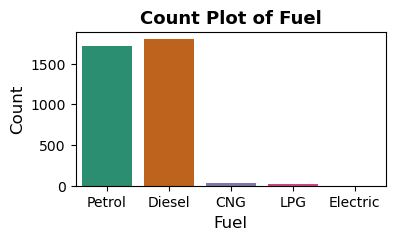

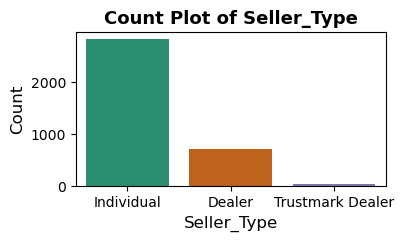

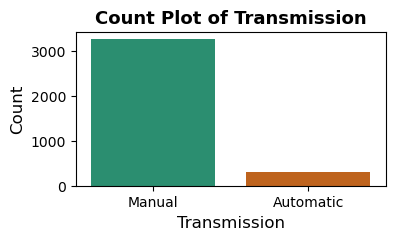

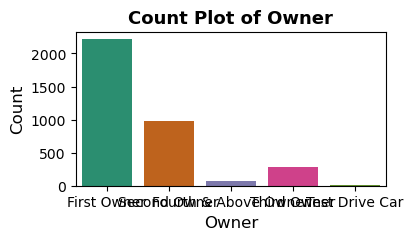

In [32]:
# Plotting Count Plot for Choosen Categorical Features
for i in categorical_col[2:]:
    plt.figure(figsize=(4,2))
    sns.countplot(data=df, x=i, palette='Dark2')  
    plt.title(f'Count Plot of {i}',weight='bold',fontsize=13)  
    plt.xlabel(i,fontsize=12)
    plt.ylabel('Count',fontsize=12)  
    plt.show()


Text(0, 0.5, 'Car Brand')

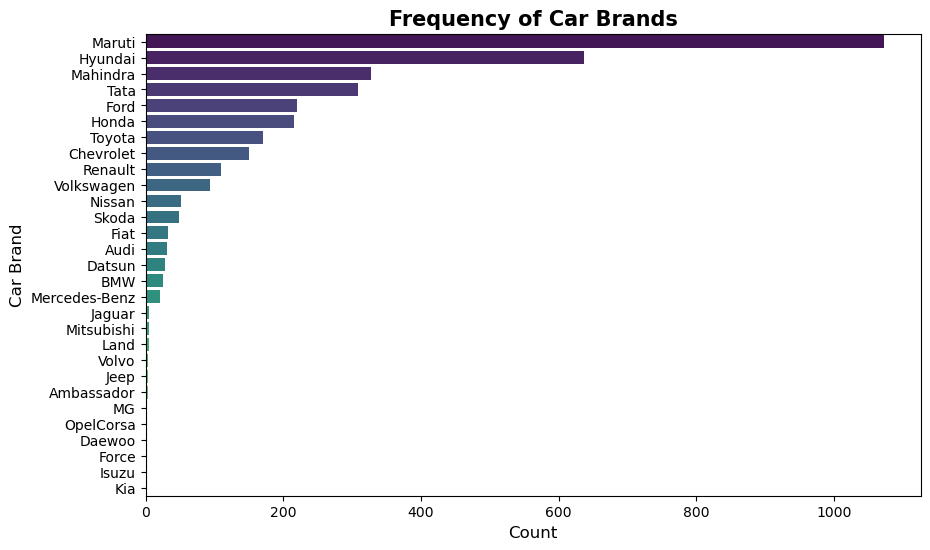

In [34]:
company = df['Car_Brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=company.values, y=company.index, palette="viridis")
plt.title('Frequency of Car Brands', weight='bold', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Car Brand', fontsize=12)

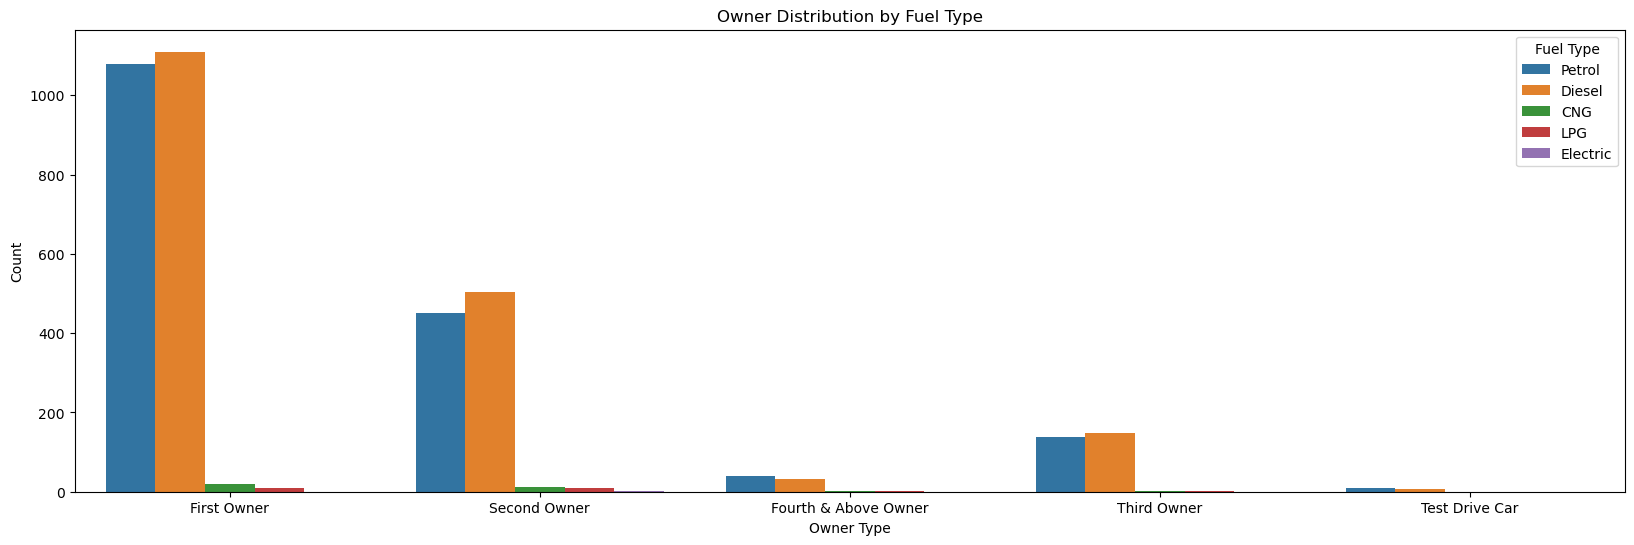

In [36]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Owner', hue='Fuel')
plt.title('Owner Distribution by Fuel Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.legend(title='Fuel Type') 
plt.show()

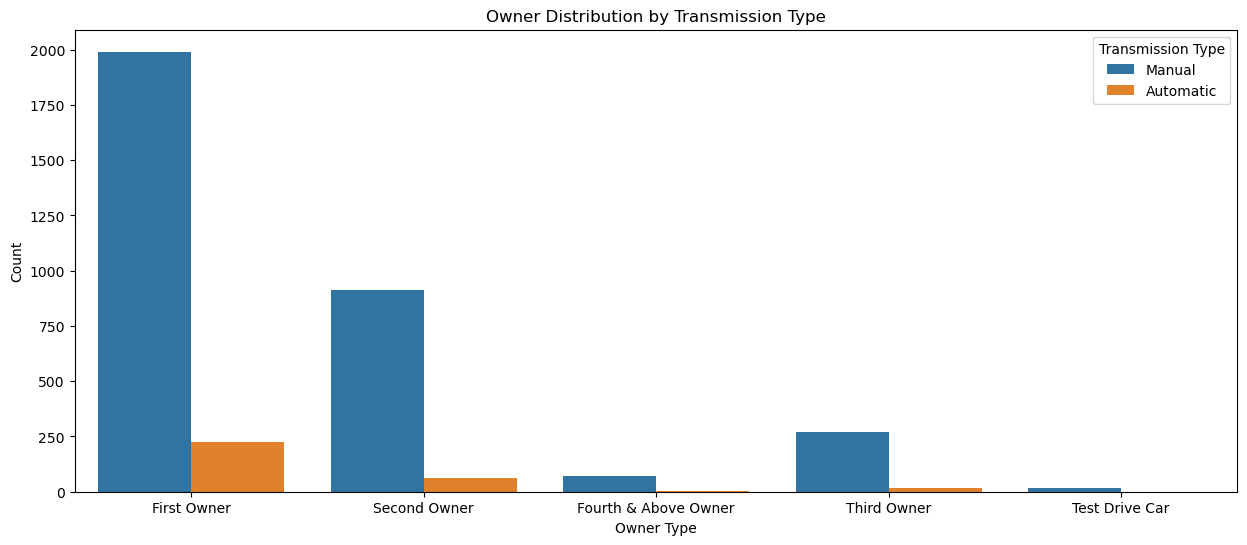

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Owner', hue='Transmission')  
plt.title('Owner Distribution by Transmission Type')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.legend(title='Transmission Type')
plt.show()

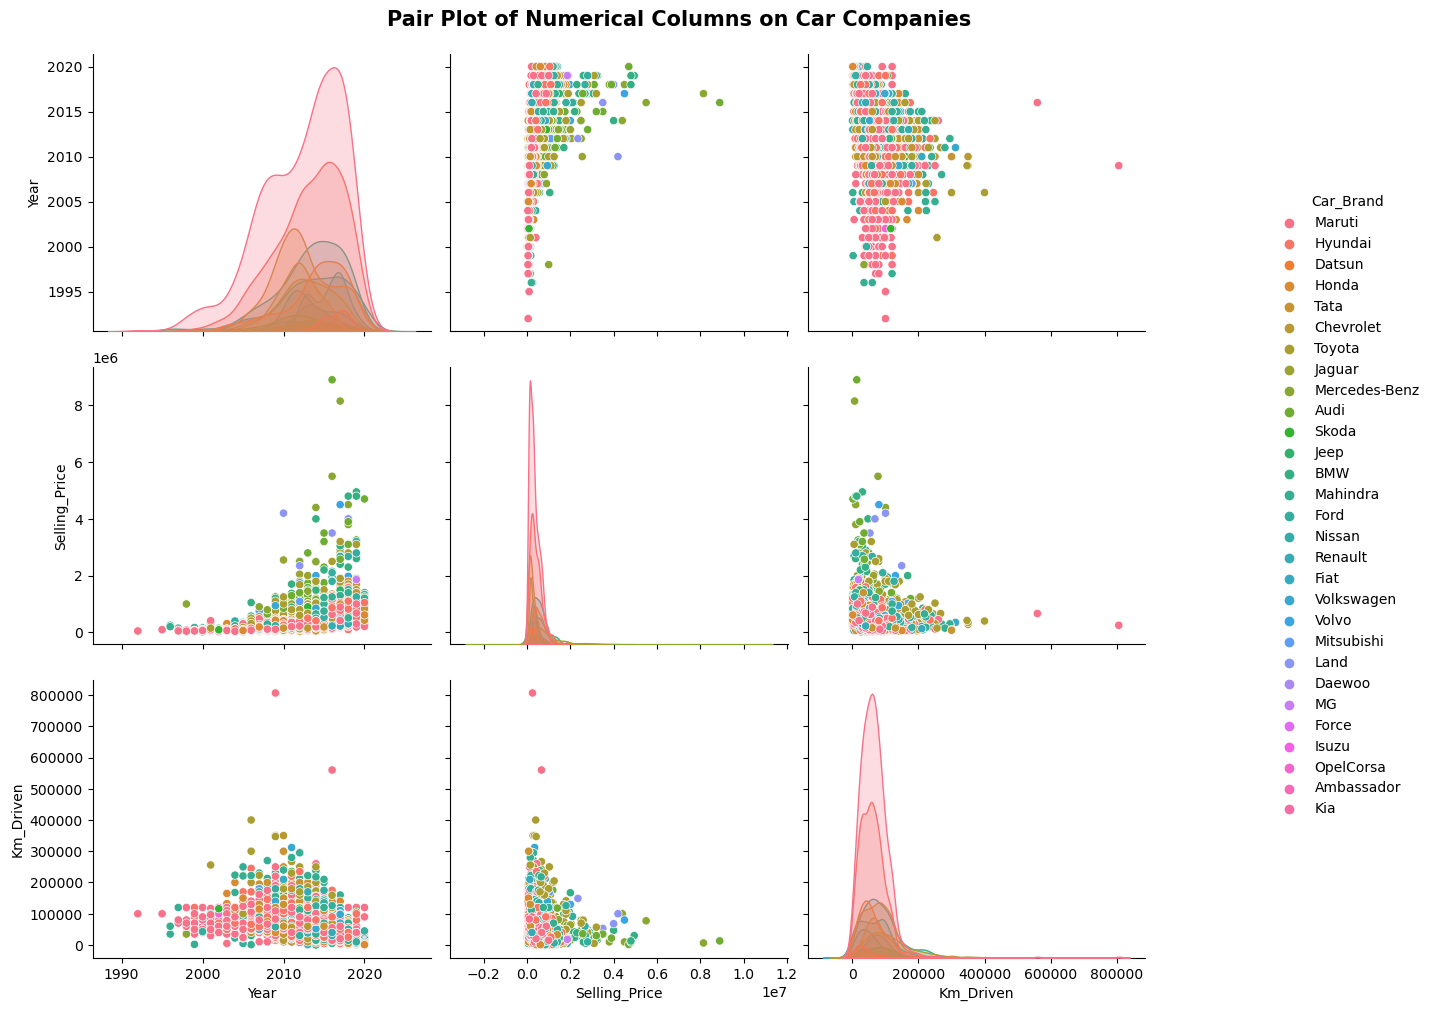

In [40]:
# Plotting Pair Plot for Numerical Columns
plot = sns.pairplot(df, hue='Car_Brand')
plot.fig.set_size_inches(15, 10)
plt.gcf().suptitle('Pair Plot of Numerical Columns on Car Companies', y=1.025, weight='bold', fontsize=15)
plt.show()

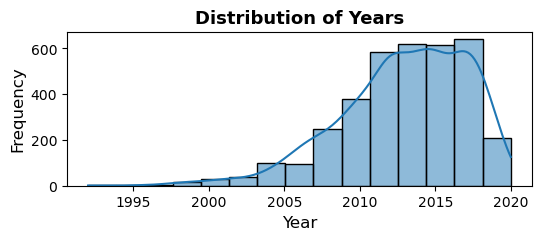

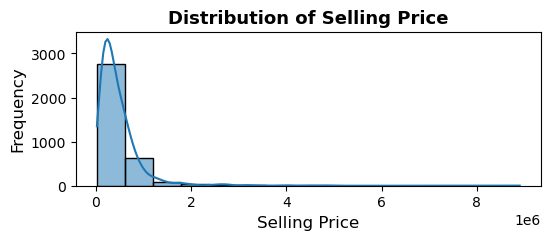

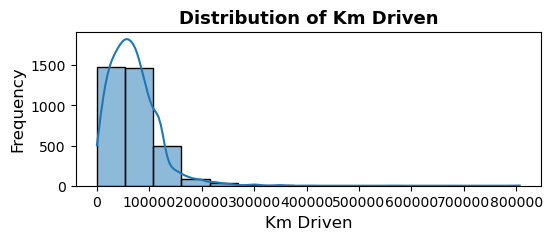

In [43]:
# Analyse the distribution of Numerical columns
titles = ['Distribution of Years','Distribution of Selling Price','Distribution of Km Driven'] 
for i, col in enumerate(numerical_col):
    plt.figure(figsize=(6, 2))
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(titles[i], weight='bold', fontsize=13)
    plt.xlabel(col.replace('_', ' '), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

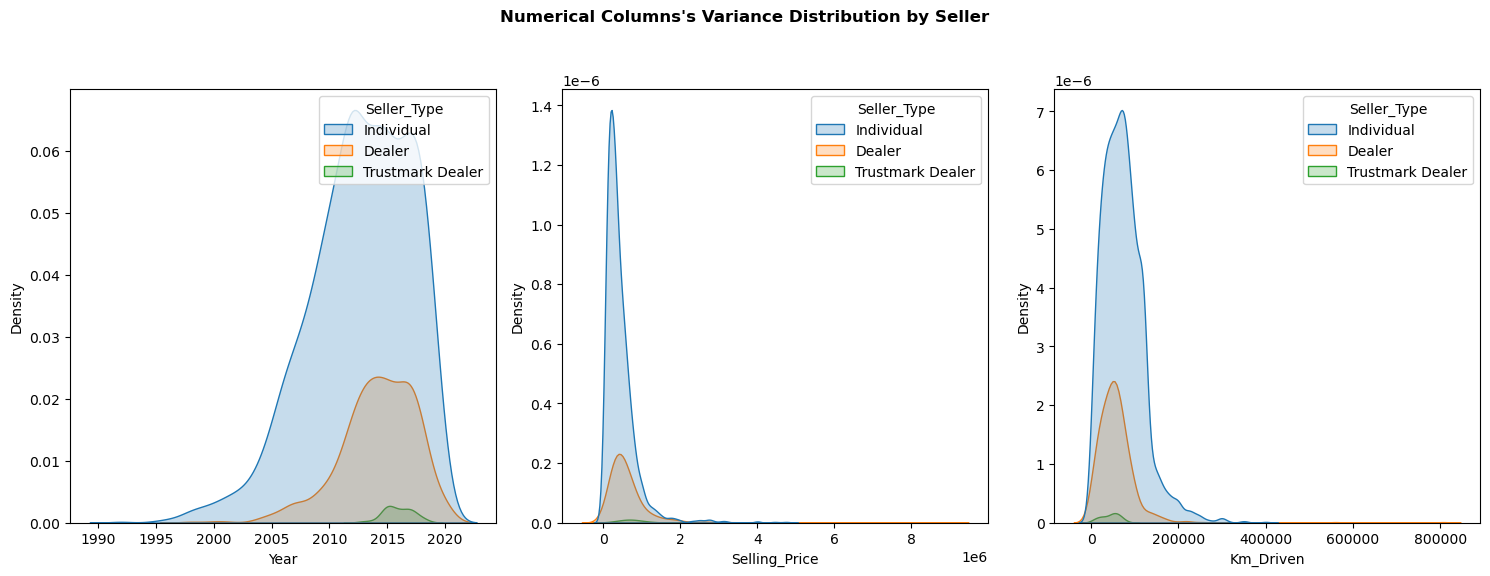

In [47]:
plt.figure(figsize=(15,10))
for i in range(len(numerical_col)): 
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data=df, x=numerical_col[i], hue='Seller_Type', fill=True)
plt.suptitle("Numerical Columns's Variance Distribution by Seller", y=1.02,weight='bold',fontsize=12)
plt.tight_layout() 
plt.show()

## Plotting some important Bivariate plot on Fuel Type

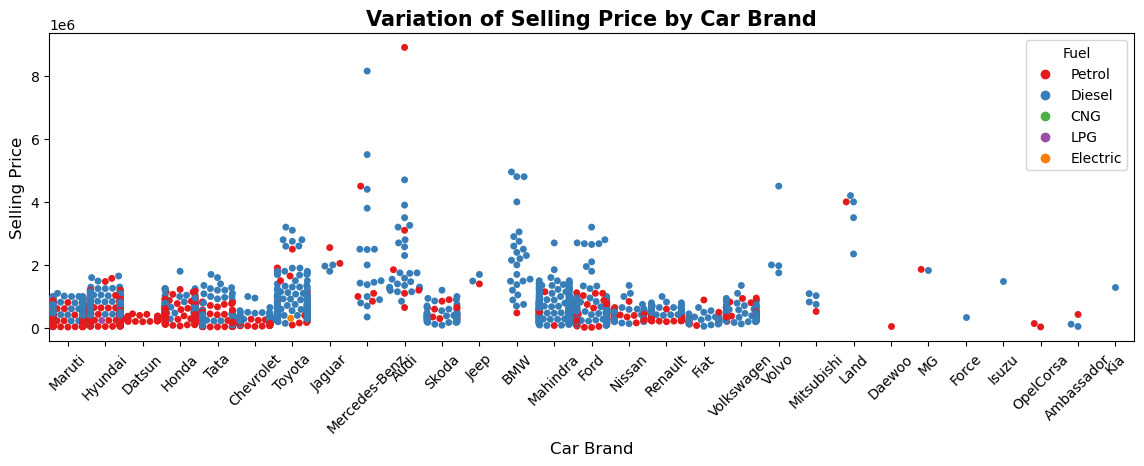

In [59]:
plt.figure(figsize=(14, 4))
sns.swarmplot(x='Car_Brand', y='Selling_Price', data=df, hue='Fuel', palette='Set1')
plt.title('Variation of Selling Price by Car Brand',weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Selling Price",fontsize=12)
plt.xlabel("Car Brand",fontsize=12)
plt.show()

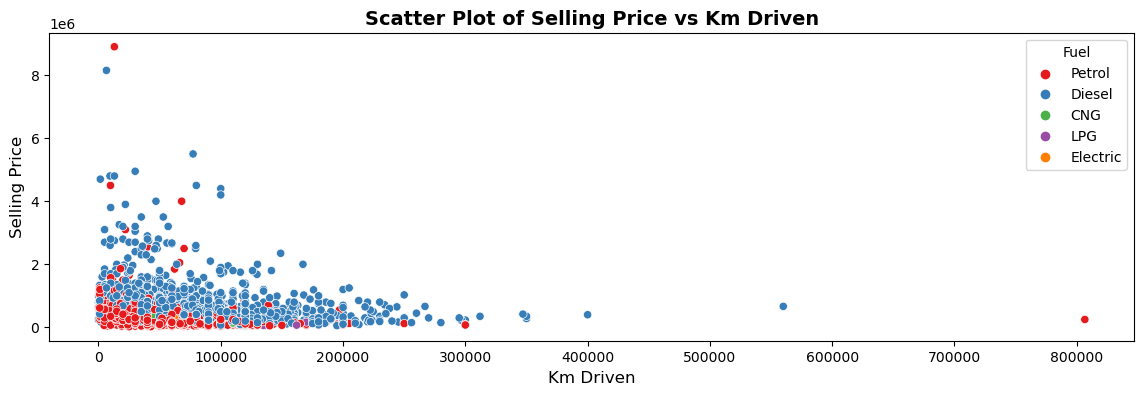

In [60]:
plt.figure(figsize=(14, 4))
sns.scatterplot(x='Km_Driven', y='Selling_Price', data=df, hue='Fuel', palette='Set1')
plt.title('Scatter Plot of Selling Price vs Km Driven', weight='bold', fontsize=14)
plt.xlabel("Km Driven", fontsize=12)
plt.ylabel("Selling Price",fontsize=12)
plt.show()

## Correlation Between Data

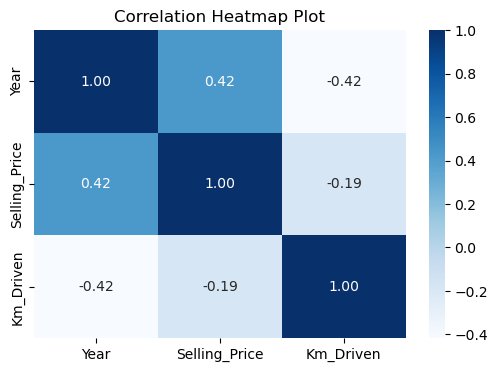

In [61]:
# Checking Correlation Between Numerical Columns
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Heatmap Plot")
plt.show()

## Outlier Detection

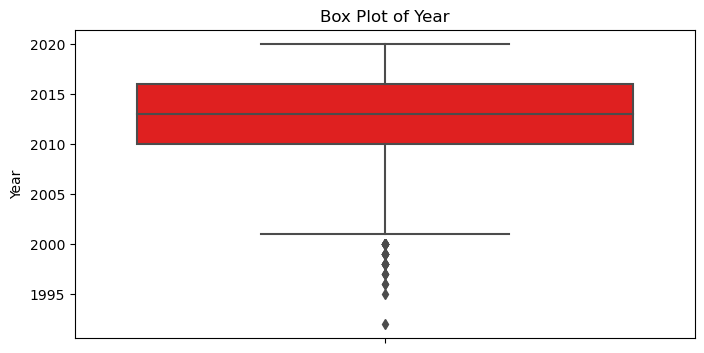

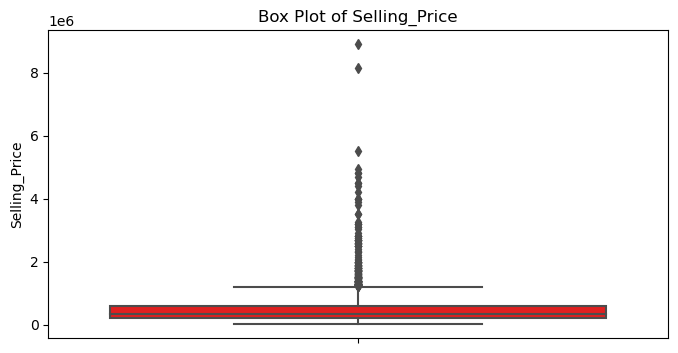

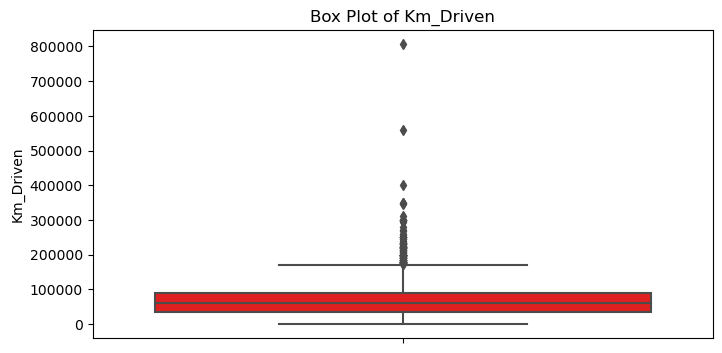

In [64]:
# Plotting Bar Plot On Numerical Columns
for i in numerical_col:
    plt.figure(figsize=(8, 4))  
    sns.boxplot(data=df, y=i,color ='red')  
    plt.title(f'Box Plot of {i}')  
    plt.show()

### Performing on Outliers

In [66]:
# Analysing Outliers 
outliers = df.describe(percentiles=(0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.96, 0.97, 0.98, 0.99)).T
outliers = outliers[['min', '1%', '2%', '3%', '4%', '5%', '50%', '95%', '96%', '97%', '98%', '99%', 'max']]
outliers

,min,1%,2%,3%,4%,5%,50%,95%,96%,97%,98%,99%,max
Year,1992.0,2000.00,2003.0,2004.0,2005.0,2005.0,2013.0,2019.0,2019.0,2019.0,2019.0,2020.0,2020.0
Selling_Price,20000.0,51786.64,60000.0,70000.0,75000.0,80000.0,350000.0,1200000.0,1300000.0,1497200.0,1800000.0,2675000.0,8900000.0
Km_Driven,1.0,1744.08,5000.0,6525.2,10000.0,10000.0,60000.0,149534.8,157960.0,170000.0,193440.0,223158.4,806599.0


In [68]:
# Removing Outliers from Dataframe
for i in df.columns:
    if df[i].dtype in ['float64', 'int64']:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[i] >= (Q1 - 1.5*IQR)) & (df[i] <= (Q3 + 1.5*IQR))]

df = df.reset_index(drop = True)
df

,Car_Brand,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,800,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Wagon,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Verna,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,RediGO,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Amaze,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...
3140,Hyundai,i20,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3141,Hyundai,i20,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3142,Maruti,800,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3143,Hyundai,Creta,2016,865000,90000,Diesel,Individual,Manual,First Owner


# Saving this Dataset

In [70]:
# Saving the Cleaned Dataset
df.to_csv('Car_Details_Cleaned_Dataset.csv', index=False )